## FINDING HEAVY TRAFFIC INDICATORS ON I-94

**This project will attempt to analyse a dataset about the westbound traffic on I-94 Interstate highway (cars moving from Saint Paul in the East towards Minneapolis in the West). The station which were used to measure the traffic was located approximately midway between these two cities.**

**The goal of this analysis is to determine indicators of heavy traffic for that particular highway. Indicators may include weather conditions, temperature, time of the day, time of the week, etc.**

**The Dataset columns are as follows:**

`holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair

`temp` - Numeric Average temperature in kelvin

`rain_1h` - Numeric Amount in mm of rain that occurred in the hour

`snow_1h` - Numeric Amount in mm of snow that occurred in the hour

`clouds_all` - Numeric Percentage of cloud cover

`weather_main` - Categorical Short textual description of the current weather

`weather_description` - Categorical Longer textual description of the current weather

`date_time` - DateTime Hour of the data collected in local CST time

`traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


**Plotting a histogram visualizing the distribution of `traffic_volume` column:** 

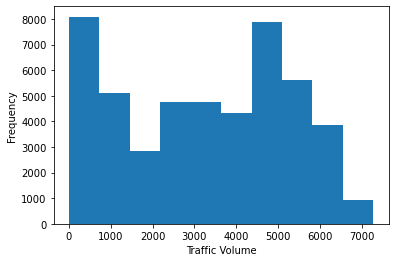

In [4]:
df['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

* About 25% of the time, there were 1,193 cars, or fewer, passing the measuring station each hour. This is probably night hours or construction hours.
* About 25% of the time, the traffic volume was four times as much (4,933 cars, or more)

## Night Traffic vs Day Traffic

* converting `date_time` column into datetime type
* copy the dataframe and then divide the copy into two parts, daytime data (7AM - 7PM) and nighttime data (7PM - 7AM)

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])

day = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [7]:
night = df.copy()[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]
print(night.shape)

(24327, 9)


Difference in row numbers between day and night is due to a few hours of missing data.

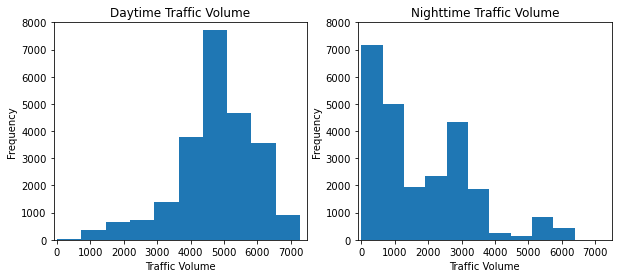

In [8]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The **Daytime Traffic Volume** histogram is left skewed, which in this case means that most of the traffic volume figures are high. On average it is about 4762 cars per hour, and there are about 4252 cars or more passing the measuring station each hour 75% of the time.

On the other hand, the **Nighttime Traffic Volume** histogram is right skewed, which in this case means that most of the traffic volume figures are low. On average it is about 1785 cars per hour, and there are only 2819 or less cars passing the measuring station each hour 75% of the time.

Considering these numbers, and given the goal of this whole project is to analyse heavy traffic indicators, it is safe to choose only the Daytime Traffic Volume figures in further analysis. 

In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [12]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Time Indicators

Month, day of the week or time of the day are some of the possible indicators of heavy traffic.

Let's first add a new column to the `day` dataframe, where each value describes the month when the traffic volume measurement was taken:

In [13]:
day['month'] = day['date_time'].dt.month

In [14]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10


After this we shall group the dataframe by the month column with the mean as an aggregate function.

In [15]:
by_month = day.groupby('month').mean()

In [16]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


In [17]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

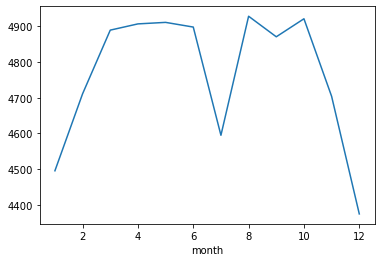

In [18]:
by_month['traffic_volume'].plot.line()
plt.show()

Now let's add another column, which will contain data for each day of the week:

In [19]:
day['dayofweek'] = day['date_time'].dt.dayofweek

In [20]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1


And now we can group the dataset by that column with the mean as an aggregate function:

In [21]:
by_dayofweek = day.groupby('dayofweek').mean()

In [22]:
by_dayofweek

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
dayofweek,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179


In [23]:
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

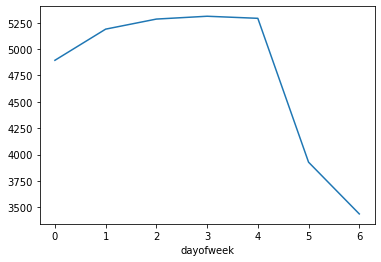

In [24]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Looking at the day of the weeks (0 - Monday to 6 - Sunday) we can extrapolate that heavy traffic ocurrs during week days (over 4750/hour on Mondays and over 5000/hour on Tuesdays through Fridays).

Separating business days from weekends:

In [25]:
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]

Adding column `hour` to analyze traffic by the hour of the day:

In [26]:
business_days['hour'] = business_days['date_time'].dt.hour
business_days

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48143,None,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,9,4,14
48144,None,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,9,4,15
48145,None,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,9,4,16
48146,None,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,9,4,17


In [27]:
weekend['hour'] = weekend['date_time'].dt.hour
weekend

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
87,None,275.17,0.00,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,10,5,7
88,None,274.99,0.00,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,10,5,8
89,None,275.09,0.00,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,10,5,9
90,None,276.88,0.00,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,10,5,10
91,None,278.04,0.00,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,10,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,6,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,6,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,6,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,6,17


Grouping business days and weekends by `hour` column:

In [28]:
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

In [41]:
print("business days by hour", by_hour_business['traffic_volume'], "\n")
print("weekend by hour", by_hour_weekend['traffic_volume'])

business days by hour hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64 

weekend by hour hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


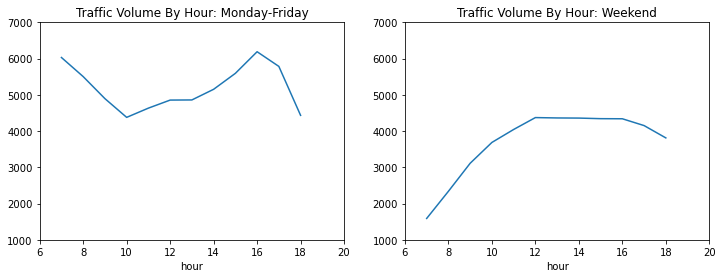

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1000,7000)
plt.title('Traffic Volume By Hour: Monday-Friday')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1000,7000)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

## WEATHER INDICATORS

Columns about weather conditions:

`temp` - numeric average temperature in kelvin

`rain_1h` - numeric amount in mm of rain that occurred in the hour

`snow_1h` - numeric amount in mm of snow that occurred in the hour

`clouds_all` - numeric percentage of cloud cover

`weather_main` - categorical short textual description of the current weather

`weather_description` - categorical longer textual description of the current weather

First four, `temp`, `rain_1h`, `snow_1h` and `clouds_all` are numerical columns, so we should analyze correlation between each of those and the `traffic_volume` figures.

In [31]:
day.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

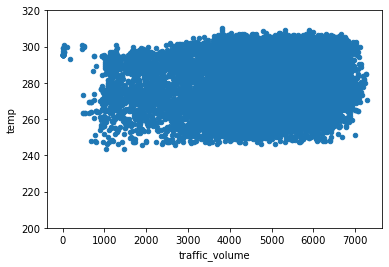

In [32]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(200,320)
plt.show()


Let's now examine two categorical columns `weather_main` and `weather_description`:

In [33]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

In [34]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
weather_main,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344


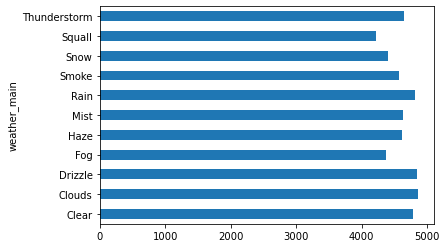

In [35]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

In [36]:
by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
weather_description,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2.895540
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2.998210
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,3.028777
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2.977253
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,0.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2.896552


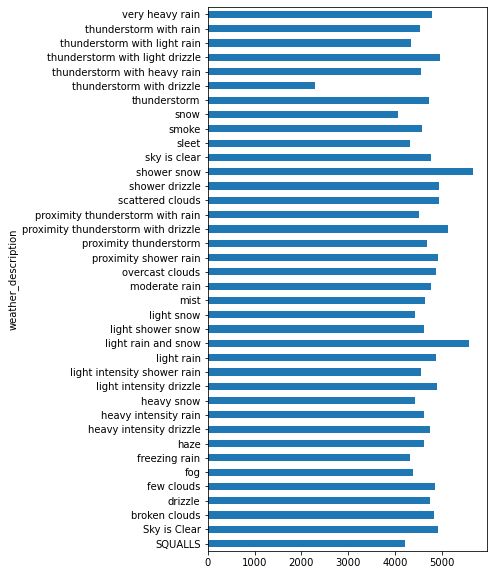

In [37]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

### Conclusion

* the traffic is heavier during warm months (March-October)
* the traffic is also heavier on business days compared to weekends
* the rush hours are around 7 and 16
* weather indicators are: shower snow, light rain and snow and proximity thunderstorm with drizzle